# Car Price Prediction

Data source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

**BACKGROUND:**<br>
Due to the increasing digitization and online market, the used car market receives significant growth. Some companies build applications to make buying and selling used cars easier and build used automotive marketplace so that buyers and sellers easily in making transactions.
<br>

**GOAL:** <br>
Increase the growth of used car sales by predicting used car price to customers.
<br>

**OBJECTIVE:** <br>
Develop machine learning model that can predict used car price based on related features.

**EVALUATION METRICS:**<br>
- RMSE
- R2

## Import Library

In [ ]:
#Library dasar
import pandas as pd
import numpy as np

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Convert data tanggal
import datetime as dt

#Memisahkan train dan test data
from sklearn.model_selection import train_test_split

#Algoritma regresi
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Evaluasi model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Data transformasi, label encoder
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


## Read the Data

In [ ]:
url ='https://raw.githubusercontent.com/mirraafifah/Used-Car-Price-Prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv'

In [ ]:
df =pd.read_csv(url)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data Preprocessing

## Handling Duplicates


In [ ]:
# Check Duplication
print(df.duplicated().sum())

763


763 entries were duplicated. Since the dataset was collected from internet source and each data does not have an identifier,  we can consider to drop the same value (duplicated value). We still keep the original data in df and copy the removed duplicated data in df2

In [ ]:
# drop duplicate values
df2=df.drop_duplicates(subset=None, keep='first', inplace=False)
df2.shape

(3577, 8)

In [ ]:
df2.duplicated().any()

False

## Handling Missing Values

In [ ]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

If we check the missing values as above, we can see no missing values for each variables. Let's check the unique values of each column.

In [ ]:
# Check the unique values of each column
df2.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

the variable 'name' of the cars has too many unique value. Later, we will exlcude the variable in modeling.

# Exploratory Data Analysis

## Descriptive Statistic

We divide the data to numerical and categorical type

In [ ]:
nums = ['year', 'selling_price', 'km_driven']
cats = ['name', 'fuel','seller_type','transmission','owner']

### Numerical Variable

In [ ]:
# Check statistic of dataset
df2[nums].describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


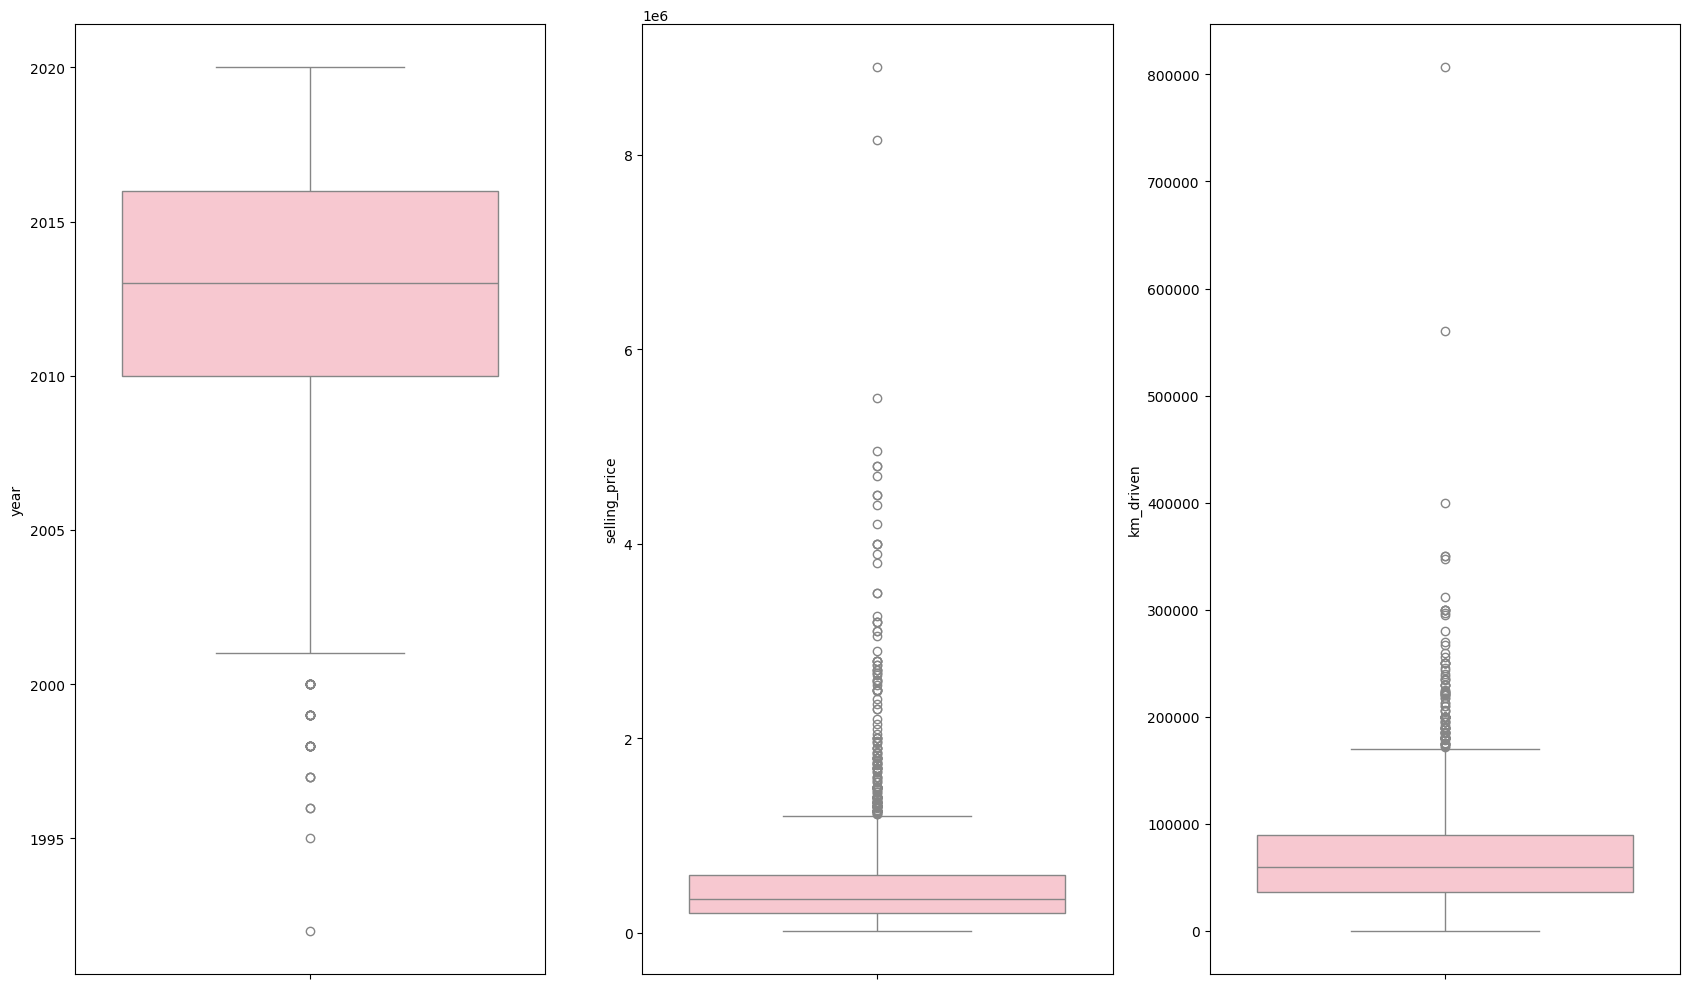

In [ ]:
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='pink')
    plt.tight_layout()

The distribution of each numerical variables have skewed distribution. <br>
- Year: negative skewed <br>
- selling price : positive skewed <br>
- km_driven :positive skewed <br>
<br>

based on interquartile range, each numerical variables have some outliers. Later we have to handle this before do modeling.


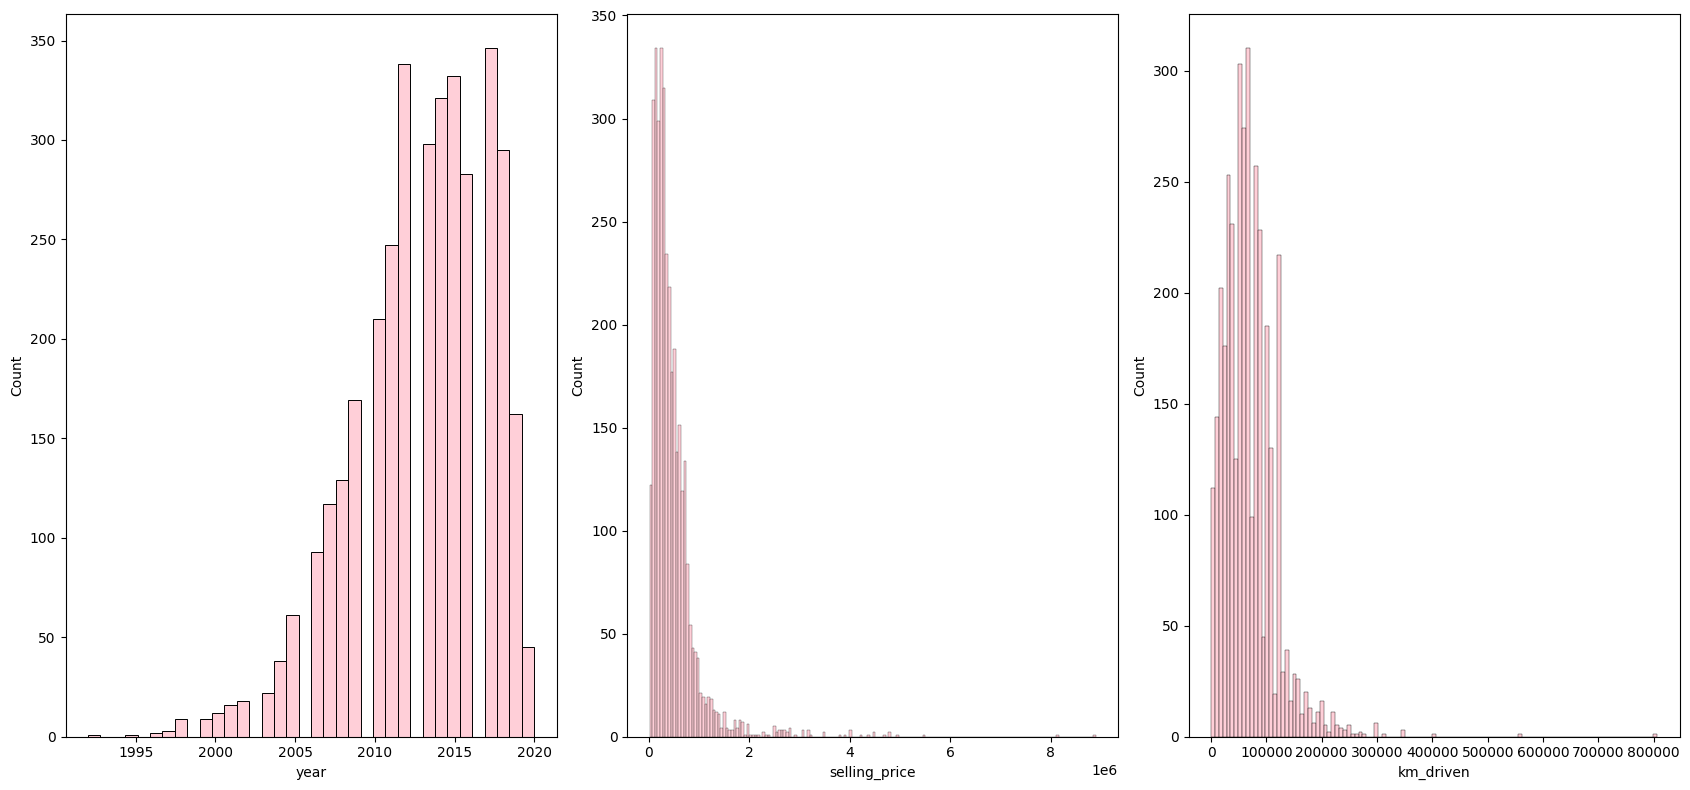

In [ ]:
plt.figure(figsize=(17, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.histplot(x=df2[nums[i]], color='pink')
    plt.tight_layout()

- Based on Year distribution, used car data are mostly from year 2010 - 2016. <br>
- Based on Selling Price distribution, used car data are mostly below 1.000.000 <br>
- Based on km_driven distribution, used car data are mostly below 100.000 km

### Categorical Variables

In [ ]:
df2[cats].describe()

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


In [ ]:
#exclude 'name' from cats
cat = ['fuel','seller_type','transmission','owner']

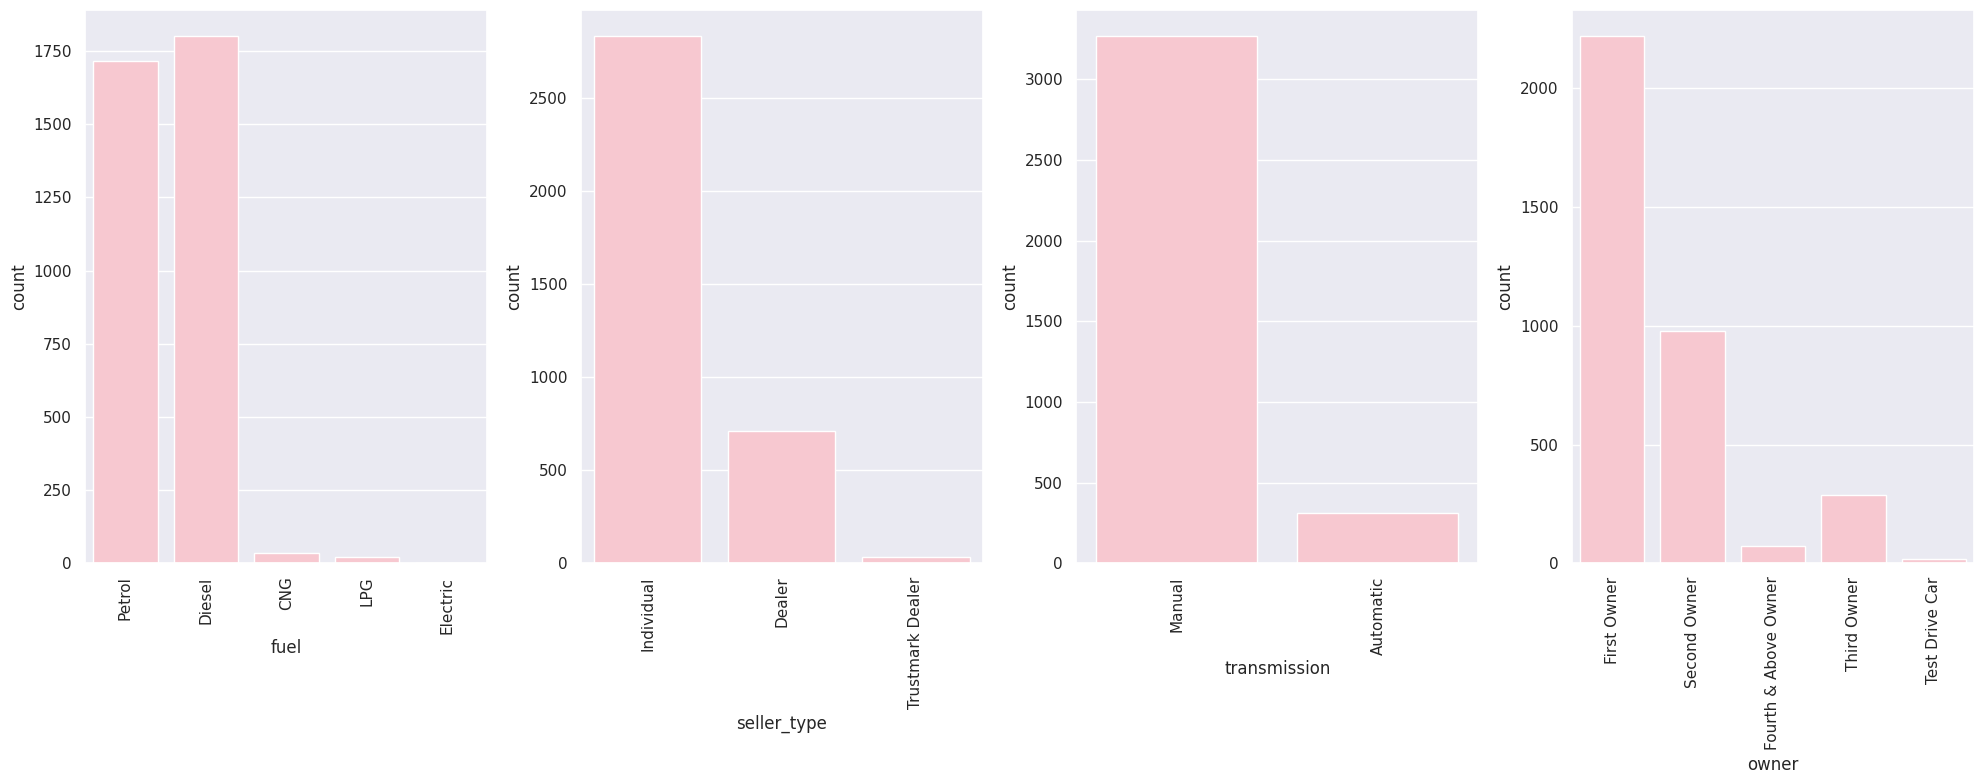

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
for i in range (0, len(cat)):
    plt.subplot(1, len(cat), i+1)
    sns.countplot(x=df2[cat[i]], color='pink')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Used cars in dataset are mostly using 'Diesel' and 'Petrol' as fuel.
- Used cars in dataset are mostly 'Individual' seller type
- Used cars in dataset are mostly using 'manual' transmission
- USed cars in dataset are mostly First Owner.

## Univariate Analysis

### Numerical Variable vs Target

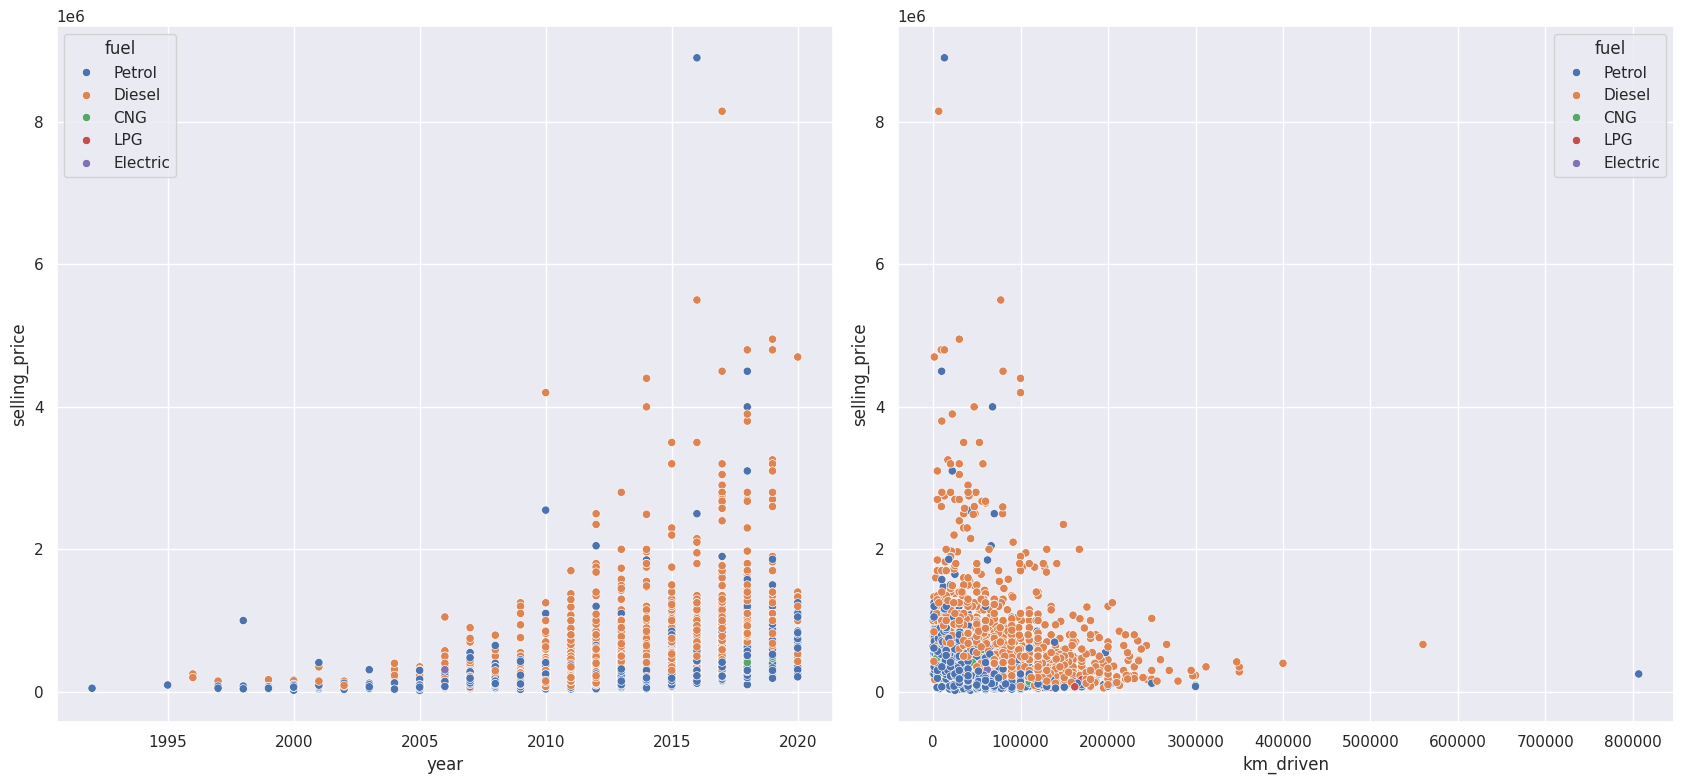

In [ ]:
sc = ['year', 'km_driven']
plt.figure(figsize=(17, 8))
for i in range(0, len(sc)):
    plt.subplot(1, len(sc), i+1)
    sns.scatterplot(x=sc[i], y ='selling_price', data = df2, hue='fuel')
    plt.tight_layout()

- Based on ' Selling_price' tren year to year, the newer of year production shows higher price than the older one. <br>
- The lower the km_driven, the higher the selling price.<br>
- Used cars fueled by petrol and diesel are evenly distributed every used car released year.
- Diesel cars are widely sold starting from 2010 released year.

### Categorical Variable vs Target

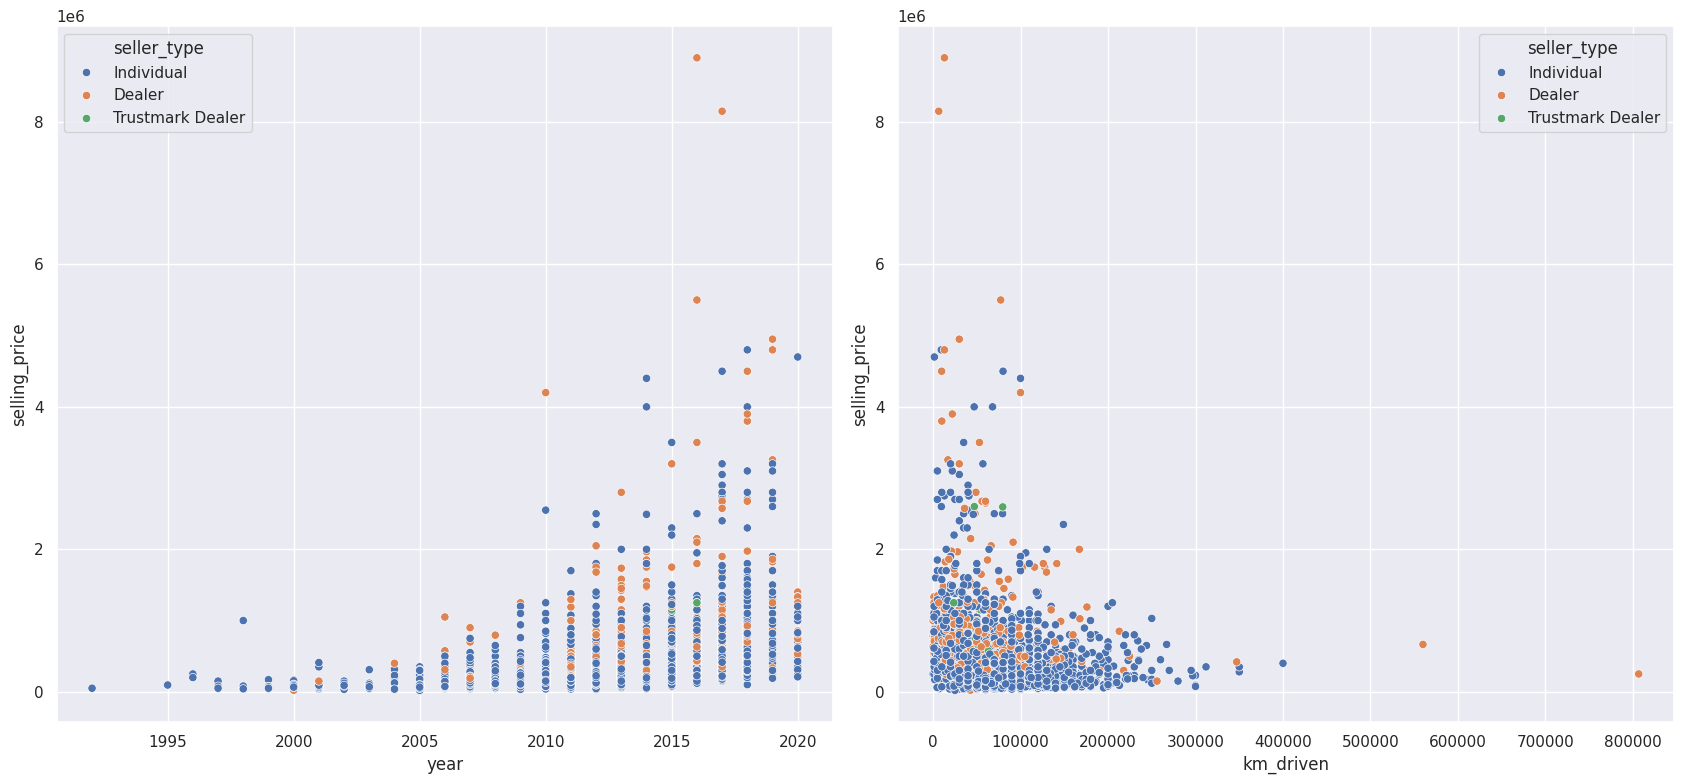

In [ ]:
sc = ['year', 'km_driven']
plt.figure(figsize=(17, 8))
for i in range(0, len(sc)):
    plt.subplot(1, len(sc), i+1)
    sns.scatterplot(x=sc[i], y ='selling_price', data = df2, hue='seller_type')
    plt.tight_layout()

- Used cars with seller type Individual and dealer are evenly distributed every year. <br>
- Seller type dealer typically sold the used car that released on year above 2000.  

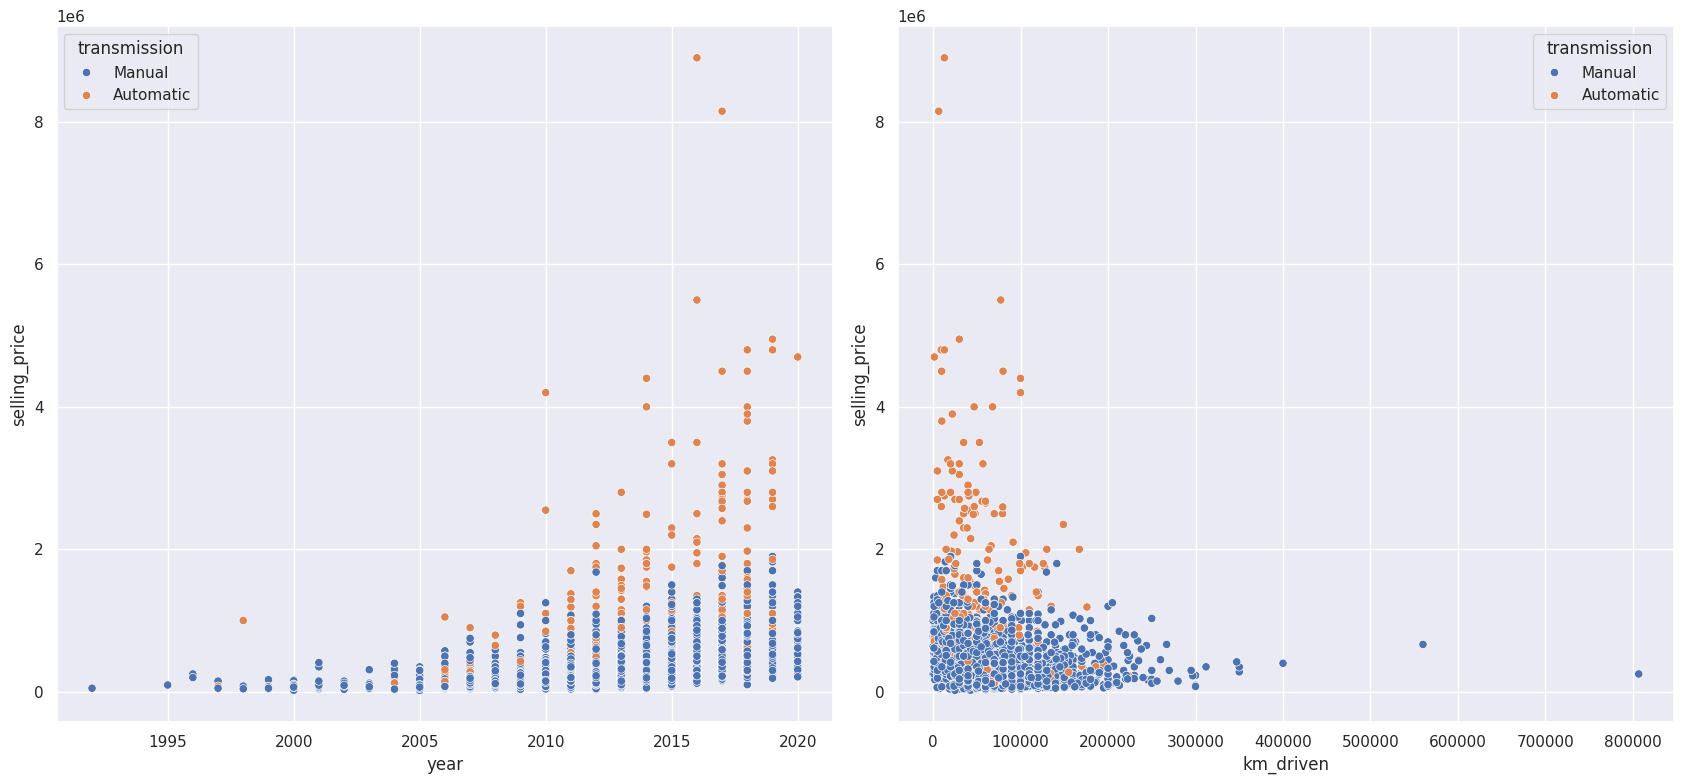

In [ ]:
sc = ['year', 'km_driven']
plt.figure(figsize=(17, 8))
for i in range(0, len(sc)):
    plt.subplot(1, len(sc), i+1)
    sns.scatterplot(x=sc[i], y ='selling_price', data = df2, hue='transmission')
    plt.tight_layout()

- used automatic cars which release before 2005 were rarely found <br>
- The price of a used car with an automatic transmission is more expensive than the price of a manual car

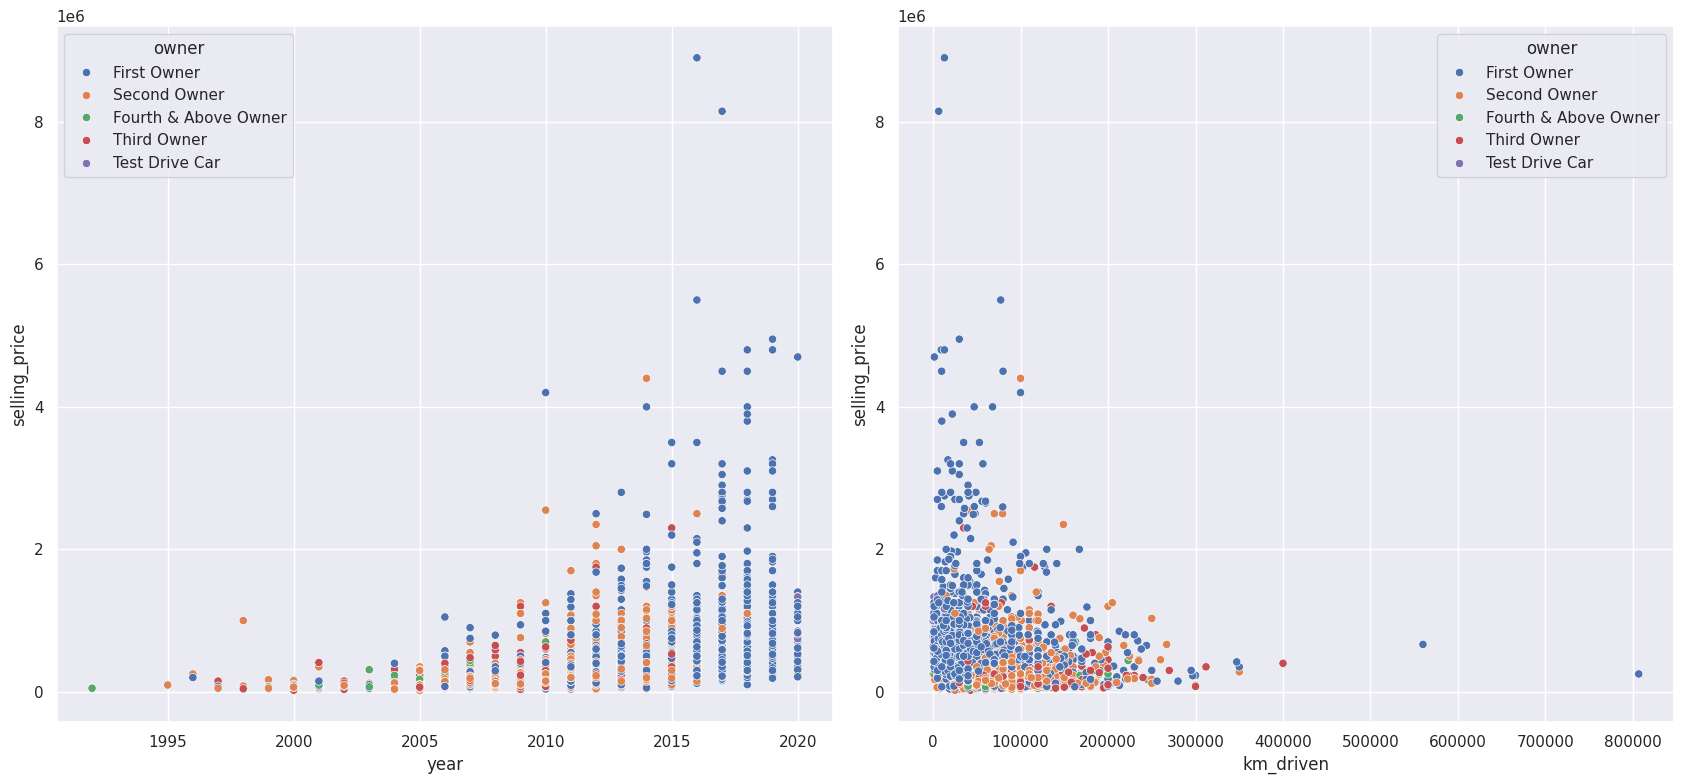

In [ ]:
sc = ['year', 'km_driven']
plt.figure(figsize=(17, 8))
for i in range(0, len(sc)):
    plt.subplot(1, len(sc), i+1)
    sns.scatterplot(x=sc[i], y ='selling_price', data = df2, hue='owner')
    plt.tight_layout()

- Used cars whose individual owner are mostly car that released from year 2015 until 2020
-  Used cars whose second owner are mostly car that released before 2015.
- First  owner used car has higher price than others.
- The lower km_driven and from the first owner, the higher the selling price.

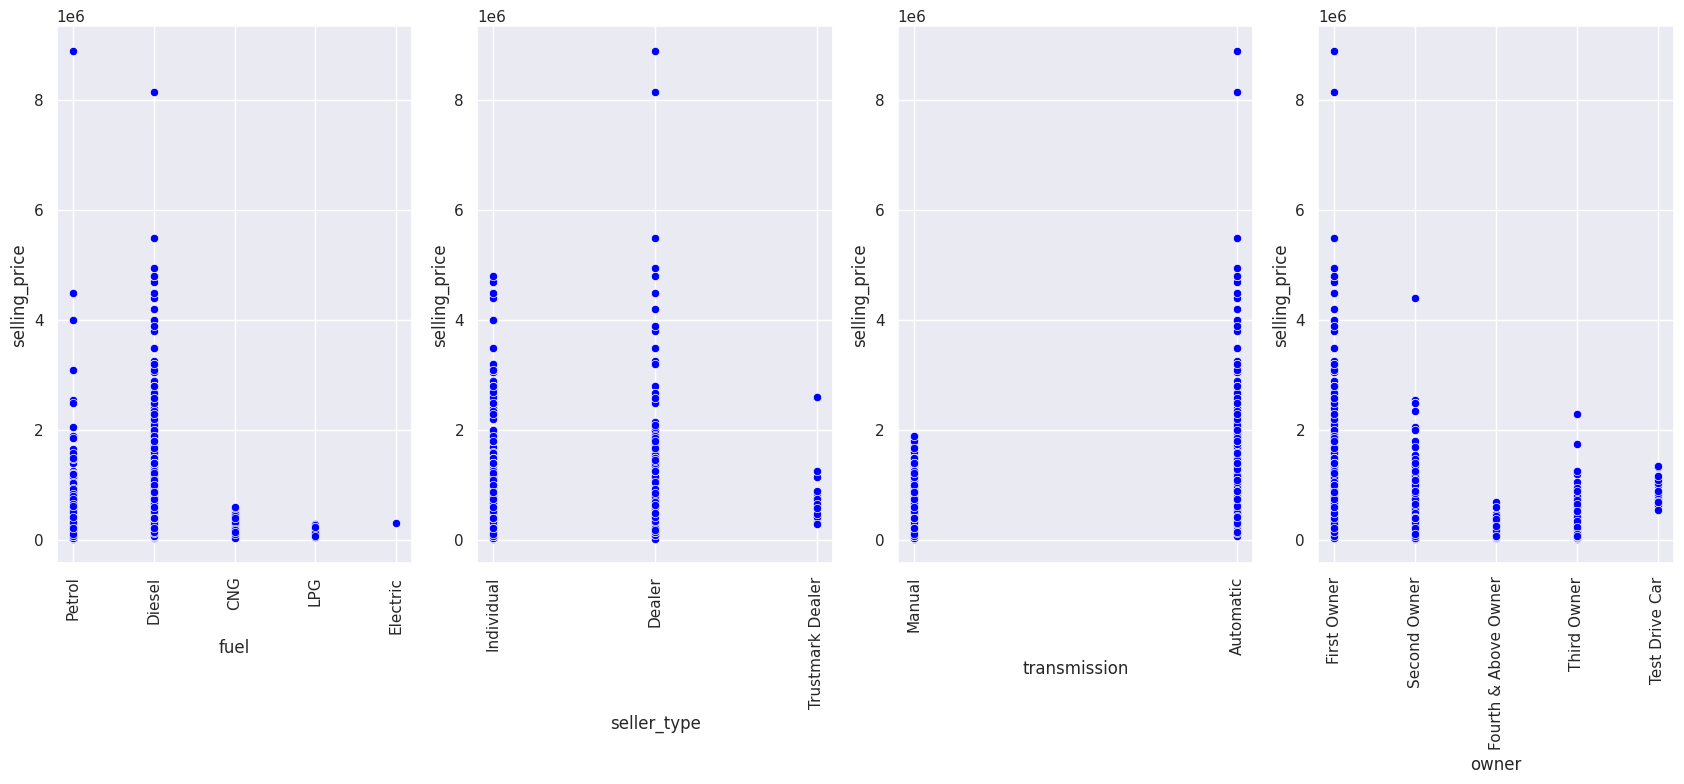

In [ ]:
plt.figure(figsize=(17, 8))
for i in range(0, len(cat)):
    plt.subplot(1, len(cat), i+1)
    sns.scatterplot(x=cat[i], y ='selling_price', data = df2, color ='blue')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Used car with diesel and petrol fuel have wider range of selling price (from low to high).
- Used car from indidual seller and dealer have wider range of selling price (from low to high).
- Automatic used car commonly has higher price than manual.
- Used car from first owner have wider range of selling price (low to high)

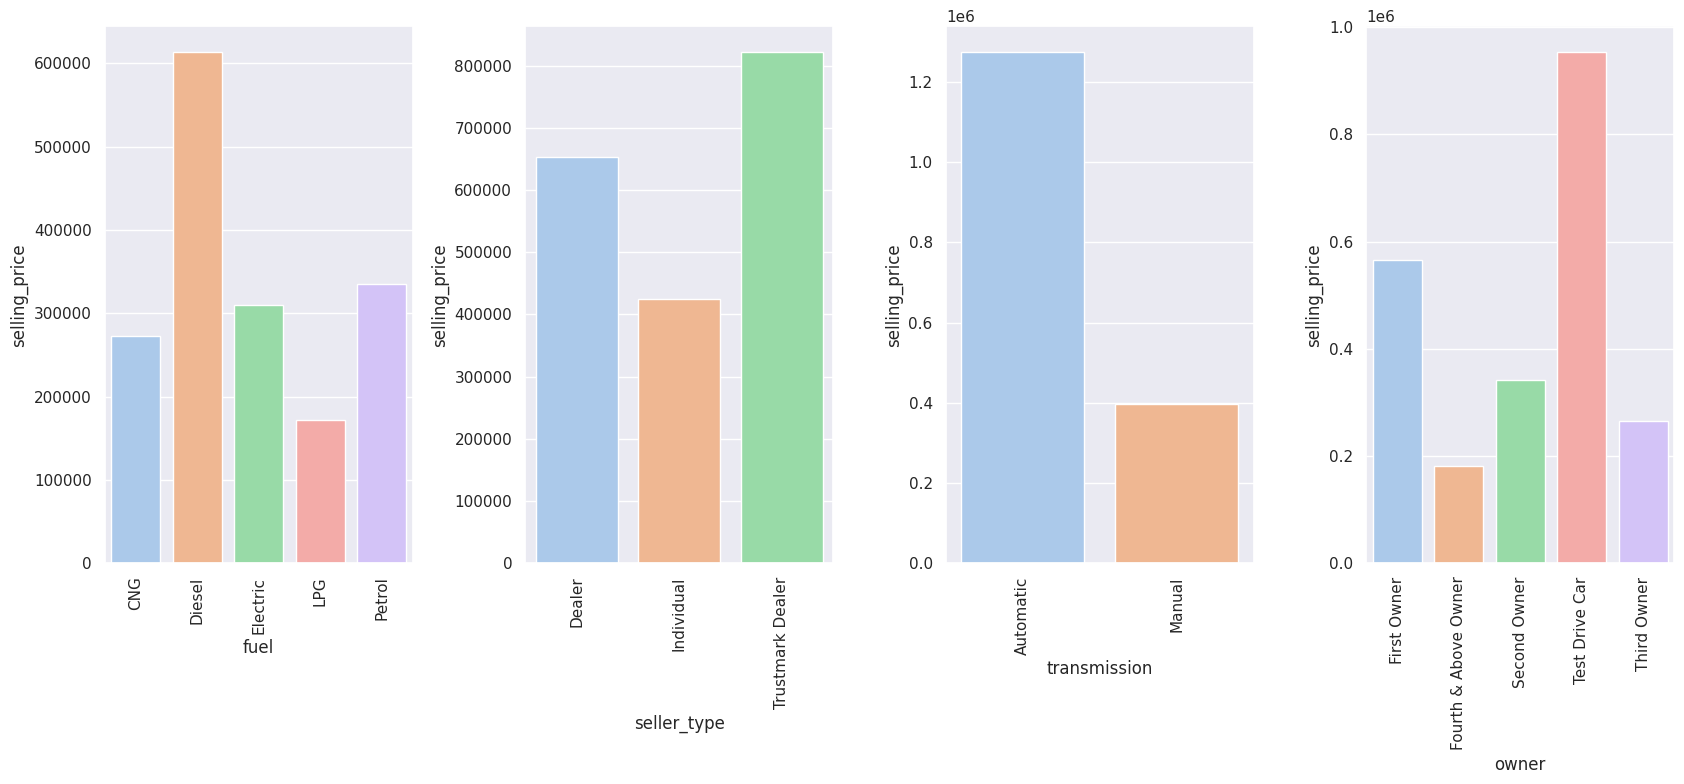

In [ ]:
plt.figure(figsize=(17, 8))
for i in range(0, len(cat)):
    plt.subplot(1, len(cat), i+1)
    df3=df2.groupby([cat[i]])['selling_price'].mean().reset_index()
    sns.barplot(x=cat[i], y ='selling_price', data = df3, palette='pastel')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Used car with diesel fuel has highest average selling price than others
- Used car from Trustmark Dealer has highest average selling price than others.
- Automatic used car  has highest average selling price than others.
- Used car from Test Drive Car has highest average selling price than others. Suprisungly it has higher average selling price than first owner.

## Target Distribution

Text(0.5, 1.0, 'Selling Price Dist - log transformation')

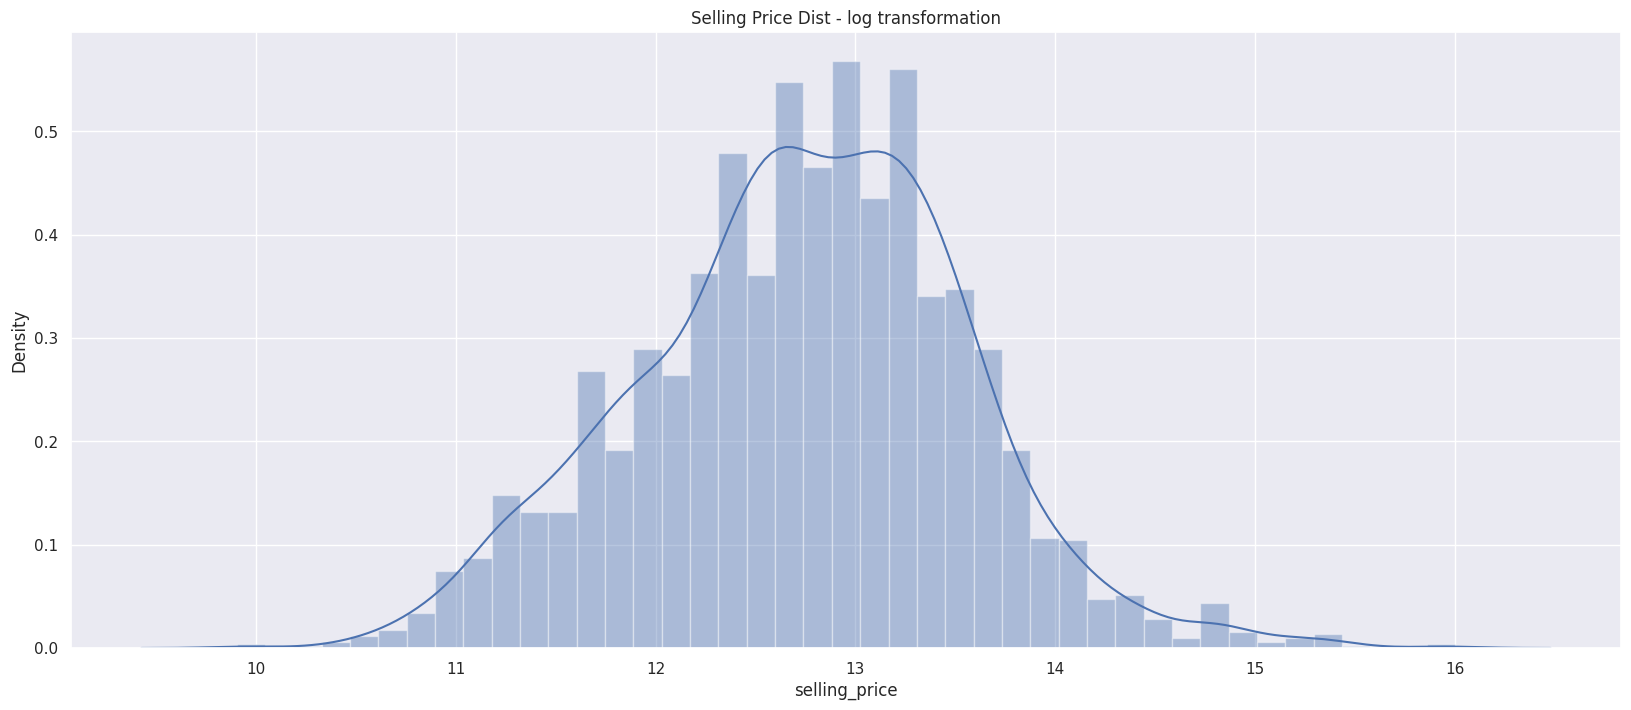

In [ ]:
sns.distplot(np.log1p(df2['selling_price']),kde=True)
plt.title('Selling Price Dist - log transformation')

As mentioned before, our numerical variables have some outlier. We consider not to remove the outliers data due to our small dataset. To handle this we use logaritmic transformation for numerical data. The distribution of logaritmic selling price is rather similar to normal distribution. Formerly, the selling price has positive skewed distribution.

## Feature Selection

Since the name of used car has to many unique values, we consider to remove the 'name' variable

In [ ]:
df2=df2.drop('name', axis=1)

In [ ]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Feature Extraction



We consider to use 'Age' of car than 'year'. So we extract the age from year column

In [ ]:
from datetime import datetime

df2['Age']=datetime.now().year - df['year']

## Normalization & One Hot Encoding

Since our categorical data are mostly nominal not an ordinal type, we consider to use one hot encoding than label encoding.
We applied logaritmic transformation then use minmaxscaler for our numerical data to set the minimum is 0 and the maximum number is 1.


In [ ]:
 from sklearn.preprocessing import MinMaxScaler

def preprocessing(df2):
    # Scaling numerical columns to logaritmic scale
    df2['selling_price'] = df2['selling_price'].apply(np.log)
    df2['km_driven'] = df2['km_driven'].apply(np.log)
    df2['Age'] = df2['Age'].apply(np.log)

    #Label encode the ordinal variables "owner".
    #df2["owner"] = df2["owner"].replace({'Test Drive Car':0,'Fourth & Above Owner':1,'Third Owner':2, 'Second Owner':3, 'First Owner':4}).astype(int)
    #df2["fuel"] = df2["owner"].replace({'Electric':0,'CNG':1,'LPG':2, 'Petrol':3, 'Diesel':4}).astype(int)
    #df2["seller_type"] = df2["owner"].replace({'Individual':0,'Dealer':1}).astype(int)
    #df2["transmission"] = df2["owner"].replace({'Manual':0,'Automatic':1}).astype(int)
    #df2 = df2.drop(['year'],axis=1)

    #Create the dummy variables
    dummies_variables = ["owner","fuel","seller_type","transmission"]
    dummies = pd.get_dummies(df2[dummies_variables])
    df2 = pd.concat([df2,dummies],axis=1)
    df2 = df2.drop(["owner","fuel","seller_type","transmission",'year'],axis=1)

    return df2

In [ ]:
df_preprocessed = preprocessing(df2)

In [ ]:
df_preprocessed.head()

,selling_price,km_driven,Age,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,11.002100,11.156251,2.833213,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,11.813030,10.819778,2.833213,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,13.304685,11.512925,2.484907,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,12.429216,10.736397,1.945910,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,13.017003,11.856515,2.302585,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['selling_price','km_driven','Age']
for var in features:
    df_preprocessed['std_'+var]= MinMaxScaler().fit_transform(df_preprocessed[var].values.reshape(len(df_preprocessed), 1))

In [ ]:
df_preprocessed=df_preprocessed.drop(['selling_price','km_driven','Age'], axis=1)

## Multivariate Analysis

Since we have convert all the variable to numerical types we consider to observe the correlation between features and correlation of the features (predictor) to the target (response).

### Linear Correlation

<Axes: >

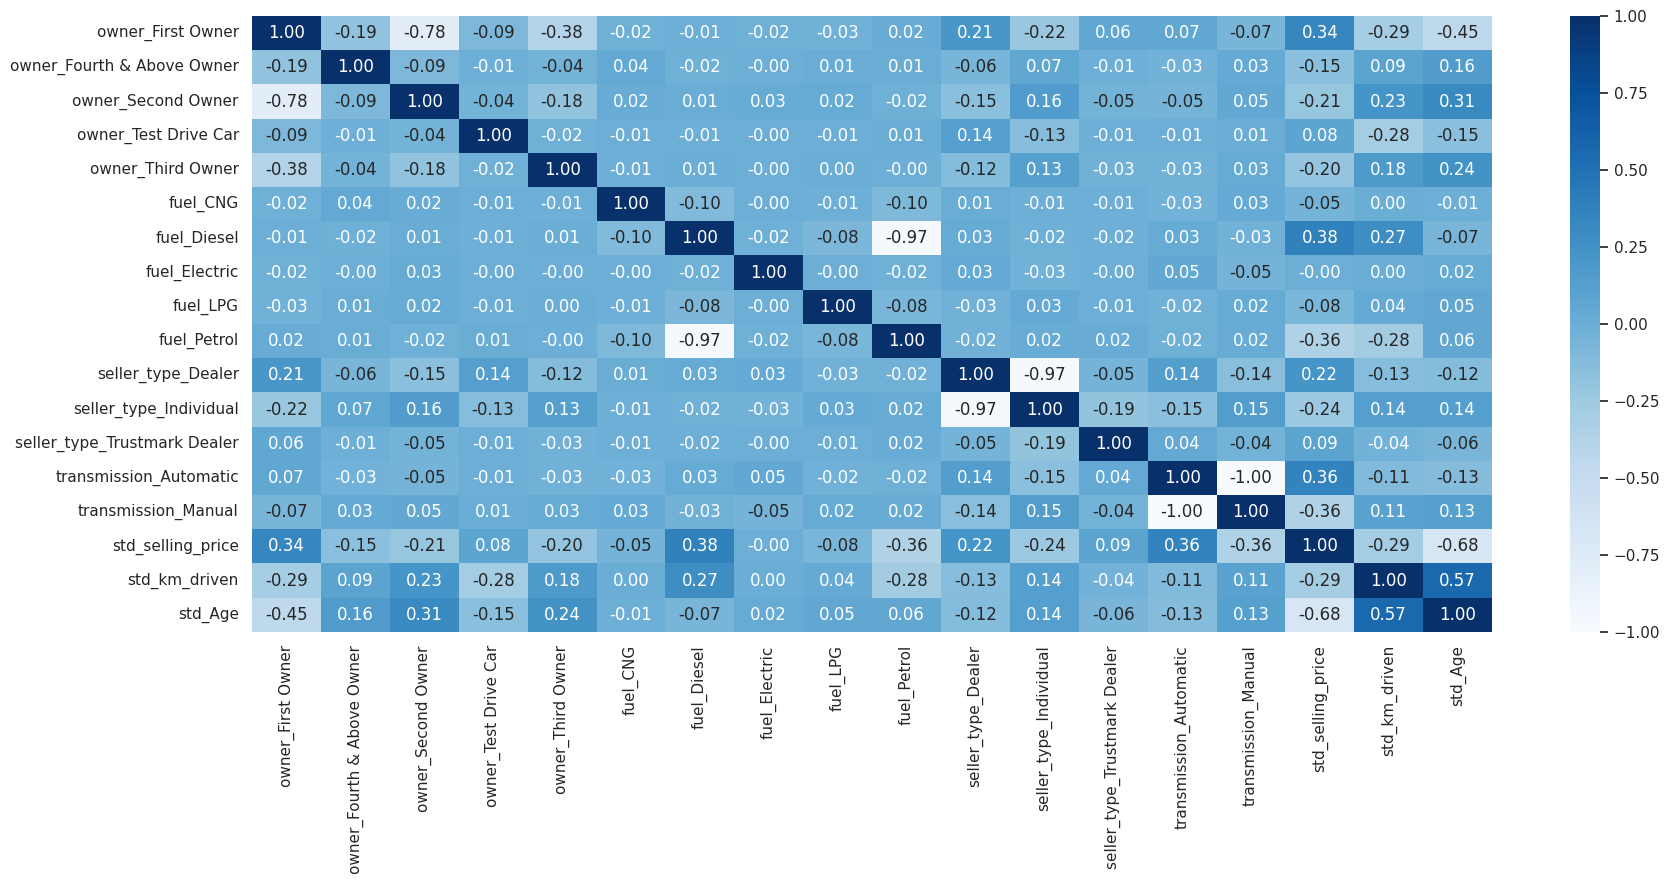

In [ ]:
sns.heatmap(df_preprocessed.corr(), cmap='Blues', annot=True, fmt='.2f')

- 'Age' (std_age) has high correlation to selling price. The correlation score is -0.68 that show negative correlation between age and selling price.
- 'Fuel', 'first owner', transmission have correlation to selling price.
- 'Age' and 'km_driven' has correlation, but we consider to keep both since the correlation score is below 0.6.
- 'Age' and 'first owner' has correlation, but we consider to keep both since the correlation score is below 0.6.

### Mutual Information Score

Since we have combination of numerical and categorical predictor, we have to observe the mutual information score from features to the target.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_preprocessed.drop(columns=['std_selling_price'])
y= df_preprocessed['std_selling_price']

mi_scores = mutual_info_regression(X, y,random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

std_Age                         0.395583
std_km_driven                   0.100022
transmission_Automatic          0.090607
fuel_Diesel                     0.086906
owner_First Owner               0.083526
transmission_Manual             0.074442
fuel_Petrol                     0.069102
seller_type_Individual          0.066612
seller_type_Dealer              0.052656
owner_Second Owner              0.031809
owner_Third Owner               0.024350
owner_Test Drive Car            0.013855
owner_Fourth & Above Owner      0.012079
seller_type_Trustmark Dealer    0.010317
fuel_Electric                   0.001784
fuel_CNG                        0.000000
fuel_LPG                        0.000000
Name: MI Scores, dtype: float64


# Machine Learning Model

## Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 43)

## Train Model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelLinear = ['Linear Regression', LinearRegression()]
modelLasso = ['Lasso', Lasso()]
modelRidge = ['Ridge', Ridge()]
modelGradientBoosting = ['Gradient Boosting', GradientBoostingRegressor()]
modelRandomForest = ['Random Forest', RandomForestRegressor()]
modelDecisionTree = ['Decision Tree', DecisionTreeRegressor()]
modelXGBoost = ['XGBoost', XGBRegressor()]

In [ ]:
def modelEvaluation(xTrain, yTrain, xTest, yTest, mdl):
    mdl[1].fit(xTrain, yTrain)
    y_pred = mdl[1].predict(xTest)
    mae = mean_absolute_error(yTest, y_pred)
    rmse = np.sqrt(mean_squared_error(yTest, y_pred))
    r2Score = r2_score(yTest, y_pred)
    return pd.DataFrame([[mdl[0], mae, rmse, r2Score]], columns= ['model','mae','rmse','r2_score'])

## Model Prediction

In [ ]:
modelLinear_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelLinear)
modelLasso_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelLasso)
modelRidge_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelRidge)
modelGradientBoosting_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelGradientBoosting)
modelRandomForest_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelRandomForest)
modelDecisionTree_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelDecisionTree)
modelXGBoost_ = modelEvaluation(X_train,  y_train, X_test, y_test, modelXGBoost)


compareModel = pd.concat([modelLinear_,modelLasso_ , modelRidge_, modelGradientBoosting_, modelRandomForest_,modelDecisionTree_,modelXGBoost_])

In [ ]:
compareModel = compareModel.reset_index(drop=True)

In [ ]:
compareModel.style.background_gradient(axis=0, cmap='Greens',subset= ['r2_score'])

,model,mae,rmse,r2_score
0,Linear Regression,0.062909,0.080239,0.624711
1,Lasso,0.105112,0.131171,-0.002927
2,Ridge,0.062673,0.080134,0.625697
3,Gradient Boosting,0.060098,0.078636,0.639558
4,Random Forest,0.065138,0.085439,0.574498
5,Decision Tree,0.078207,0.103561,0.374846
6,XGBoost,0.062005,0.081929,0.608739


Based on R2 and RMSE score, we got three best algorithm: linear reg, Ridge, and Gradient Boosting. Lets make evaluation by comparing the performance on data train vs data test.

### Model Evaluation

In [ ]:
def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAE (test): ' + str(mean_absolute_error(y_test, y_pred)))
  print('MAE (train): ' + str(mean_absolute_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
eval_regression(lr)

RMSE (test): 0.08023930562807667
RMSE (train): 0.0766880504381747
MAE (test): 0.062909065925168
MAE (train): 0.059138653706627915
r2 (test): 0.6247114404991518
r2 (train): 0.675861726826138


In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE (test): 0.08013385310418912
RMSE (train): 0.0766449486470965
MAE (test): 0.06267285306511879
MAE (train): 0.05908654445773161
r2 (test): 0.6256972197294315
r2 (train): 0.6762259821158166


In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
eval_regression(gb)

RMSE (test): 0.07865834925091941
RMSE (train): 0.07028744990405193
MAE (test): 0.060121156035563186
MAE (train): 0.05396047313651603
r2 (test): 0.6393543836480289
r2 (train): 0.7277107513737804


By comparing perfomance of three models on data train and data test, we consider to use Gradient Boosting as our algorithm models. The RMSE score from GB is the lowest and the R2 is the highest

### Hyperparameter Tuning

To optimize the Gradient Boosting performance we do hyperparameter tuning to search the best score and the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Gradient Boosting Regressor
gb= GradientBoostingRegressor()

# Grid hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

#  GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)

# grid searcf
grid_search.fit(X_train, y_train)

# Print the best result
print("The best hyperparameter:", grid_search.best_params_)
print("The best score validation:", grid_search.best_score_)

The best hyperparameter: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
The best score validation: 0.6859014612667853


Mean Absolute Percentage Error (MAPE)

In [ ]:
gb_tuned= GradientBoostingRegressor(learning_rate= 0.05, max_depth= 3, n_estimators= 200)

gb_tuned.fit(X_train, y_train)
y_pred = gb_tuned.predict(X_test)

MAPE = np.mean(np.abs((y_test - y_pred)/y_test))
MAPE

0.14942621819562382

Our model has MAPE score 0.149 (14.9%).  MAPE is a percentage error metric where the value corresponds to the average amount of error that predictions have. Therefore, a lower MAPE is better, where the lower the value the more accurate the model is. Some source stated that MAPE value lower than 20% is considered a good value. This can indicate our model can be considered good.

Text(0.5, 1.0, 'feature importance score')

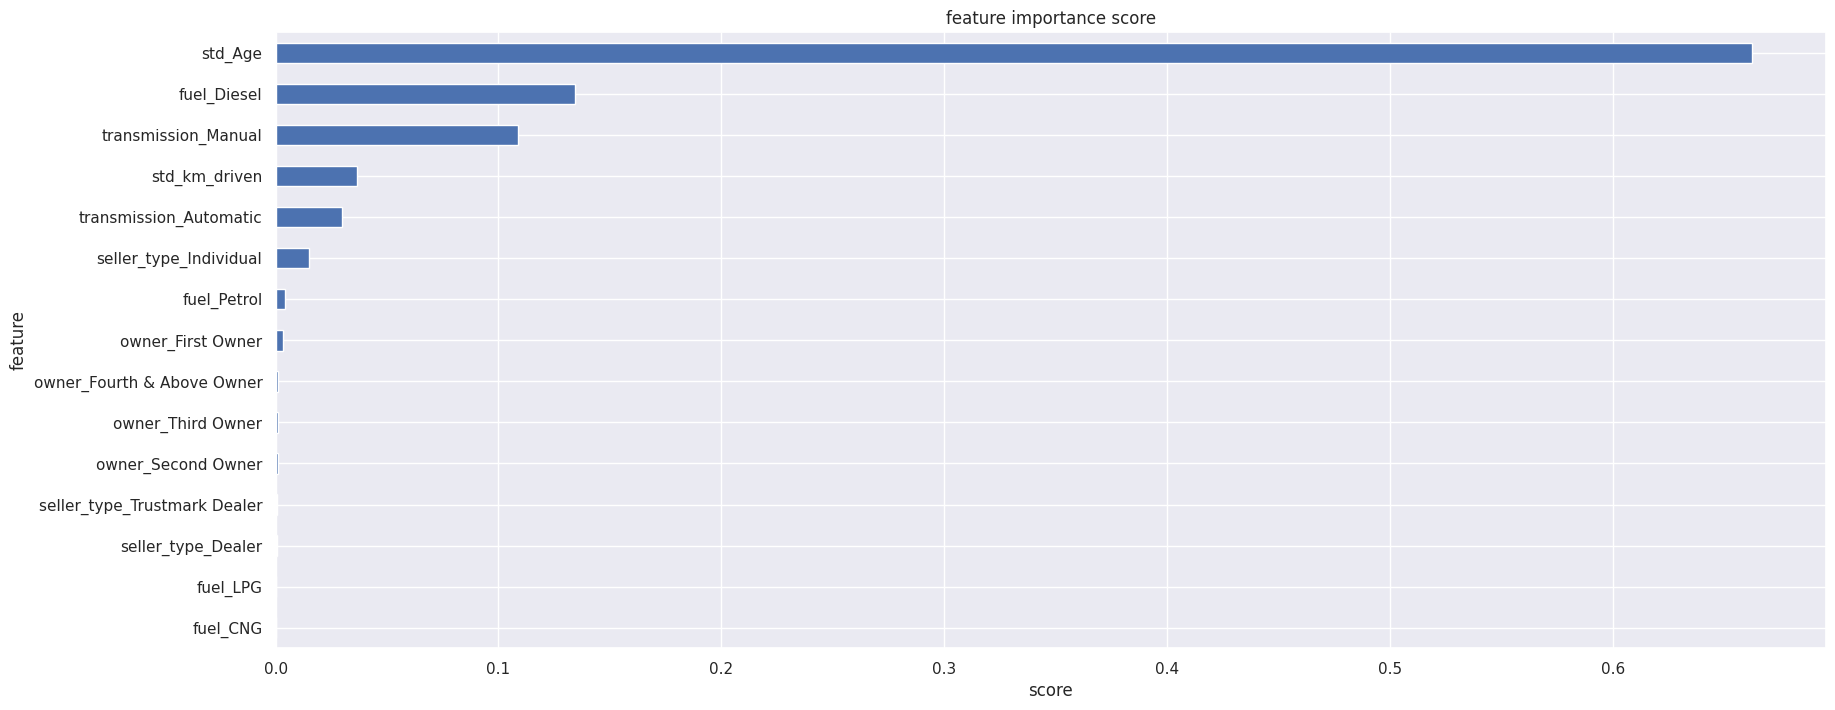

In [ ]:
#make feature importance graph
feat_importances = pd.Series(gb_tuned.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Model Deployment

In [ ]:
gb_tuned= GradientBoostingRegressor(learning_rate= 0.05, max_depth= 3, n_estimators= 200)

gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200)

In [ ]:
import pickle

pickle.dump(gb_tuned, open('car_prediction_model.pkl','wb'))

### Building API

In [ ]:
!pip install pyngrok==4.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=ae5f3788bd02862a54d5e825ec48d95b0f38f678953799ac6f6c0181509336f5
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
